In [1]:
import numpy as np
import torch
import pandas as pd
#from models.BivariateHMM import BivariateHMM
from models.CopulaHMM import CopulaHMM
from utils.Plots import plotEPS_with_states,plotEPS_distribution

In [2]:
DATA_DIR="data/"
MAX_HIDDEN_STATES=5
MIN_HIDDEN_STATES=2

In [3]:
data = pd.read_csv(f"{DATA_DIR}hulls_df_matchday2_reduced.csv")
data = data.dropna()

events=pd.read_csv(f"{DATA_DIR}matchday2_events.csv")
goals_info=events[events["Subtype"].isin(["ON TARGET-GOAL","HEAD-ON TARGET-GOAL","WOODWORK-GOAL"])]
home_goals=goals_info[goals_info["Team"]=="Home"]
away_goals=goals_info[goals_info["Team"]=="Away"]
shots_info=events[events["Type"]=="SHOT"]
home_shot=shots_info[shots_info["Team"]=="Home"]
away_shot=shots_info[shots_info["Team"]=="Away"]


sequence_XY = torch.tensor(data[["HomeHull","AwayHull"]].values/100)

## Quantitative comparison

In [4]:
AIC_list=[]
for state in range(2,MAX_HIDDEN_STATES+1):
    posterior = torch.load(f"parameters/CopulaHMM_matchday2_{state}states.pt")
    model=CopulaHMM.from_posterior(posterior)
    AIC_list.append(model.AIC(sequence_XY).item())

In [5]:
for state,aic in enumerate(AIC_list):
    print(f"AIC of the model with {state+MIN_HIDDEN_STATES} hidden states-> {aic}")

AIC of the model with 2 hidden states-> 18766.939453125
AIC of the model with 3 hidden states-> 17959.068359375
AIC of the model with 4 hidden states-> 17971.880859375
AIC of the model with 5 hidden states-> 17793.46875


## Qualitative comparison

In [6]:
HIDDEN_STATES=4

In [7]:
posterior=torch.load(f"parameters/CopulaHMM_matchday2_{HIDDEN_STATES}states.pt")

In [8]:
model=CopulaHMM.from_posterior(posterior)

In [9]:
MLS=model.viterbi(sequence_XY)

In [10]:
data["State"]=MLS.numpy()

In [14]:
class_colors_4states = {
    0: '#EB5002', #arancio
    1: '#0C91B1', #blu
    2: 'red',
    3: 'blue',
    #4: 'purple'
}
class_colors_5states = {
    0: 'green',
    1: 'orange',
    2: 'red',
    3: 'blue',
    4: 'purple'
}

In [12]:
p1=plotEPS_distribution(data,class_colors_4states)

In [15]:
posterior=torch.load(f"parameters/CopulaHMM_matchday2_{5}states.pt")
model=CopulaHMM.from_posterior(posterior)
MLS=model.viterbi(sequence_XY)
data["State"]=MLS.numpy()
p2=plotEPS_distribution(data,class_colors_5states)

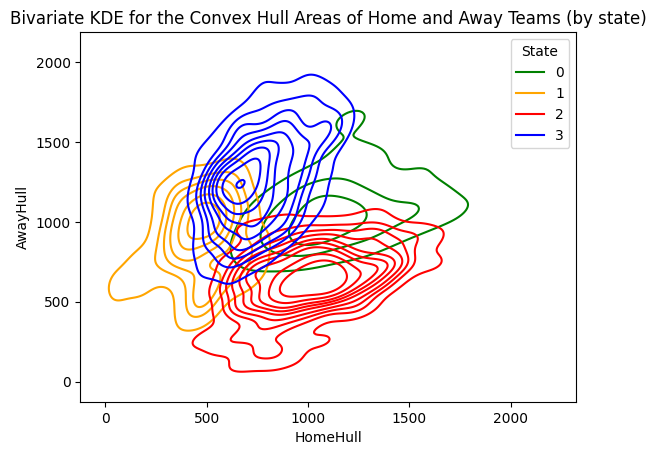

In [17]:
p1

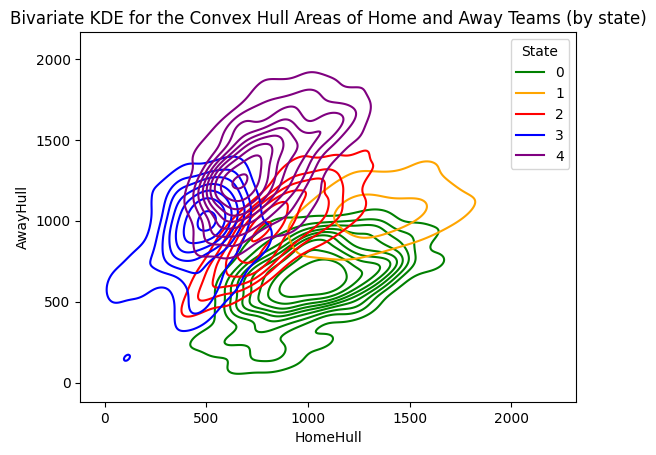

In [18]:
p2